## Hannanum to Hannanum

In [2]:
import pandas as pd
original  = pd.read_csv('df_Hannanum.csv', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

import time
Morph = []
run_time = []

In [3]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

POS_PASSWORD4 = ['F', 'N']
"""
@ REFERENCE: https://www.sketchengine.eu/wp-content/uploads/Original-HanNanum-manual.pdf
F: 외국어
N: 체언
"""

def preprocess4(string):
    rst = ""
    try:
        vocab_pos = hannanum.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD4:
                rst = rst + key + " "
        return rst
    
    except: return None

# https://konlpy-ko.readthedocs.io/ko/v0.4.3/api/konlpy.tag/
df_Hannanum = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Hannanum = df_Hannanum.append({'text' : preprocess4(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Hannanum')
run_time.append(time.time()-start)
df_Hannanum.head()

,text
0,어커버 하프집업후리스 HALF ZIP UP SILKY FLEECE HALF ZIP ...
1,[18DAY] 남미배낭여행 (볼리비아 라파즈 시간반 이동 후 라파즈 도착 도둑 아입...
2,Made U 스윗서브 후리스반집업후드-뽀글 양털 후드티 리 것 상품명 Made U ...
3,choiroom 터틀 원피스 니트 세트 뒷면 초이룸 베스트상품 함께보 [무배]반폴라...
4,남자옷코디 형스타 양털반집업후리스 오버핏 남자맨투맨추천 옷 남자맨투맨추천 양털반집업...


In [4]:
run_time

[1076.4250738620758]

In [5]:
df_Hannanum.to_csv("df_Hannanum2Hannanum.csv", header=False, index=False)

#### 시각화

In [6]:
df_Hannanum = pd.read_csv("df_Hannanum2Hannanum.csv").dropna()

temp = df_Hannanum.values.tolist()
list_Hannanum = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Hannanum.append(vocab)
series_Hannanum = pd.Series(list_Hannanum)
Hannanum_counts = series_Hannanum.value_counts()
Hannanum_counts

번개장터        22651
가격          20708
사이즈         18062
판매          17317
000         12999
            ...  
양심껏             1
NS98K05B        1
#오버핏후드티         1
리무진             1
아이폰7            1
Length: 193573, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

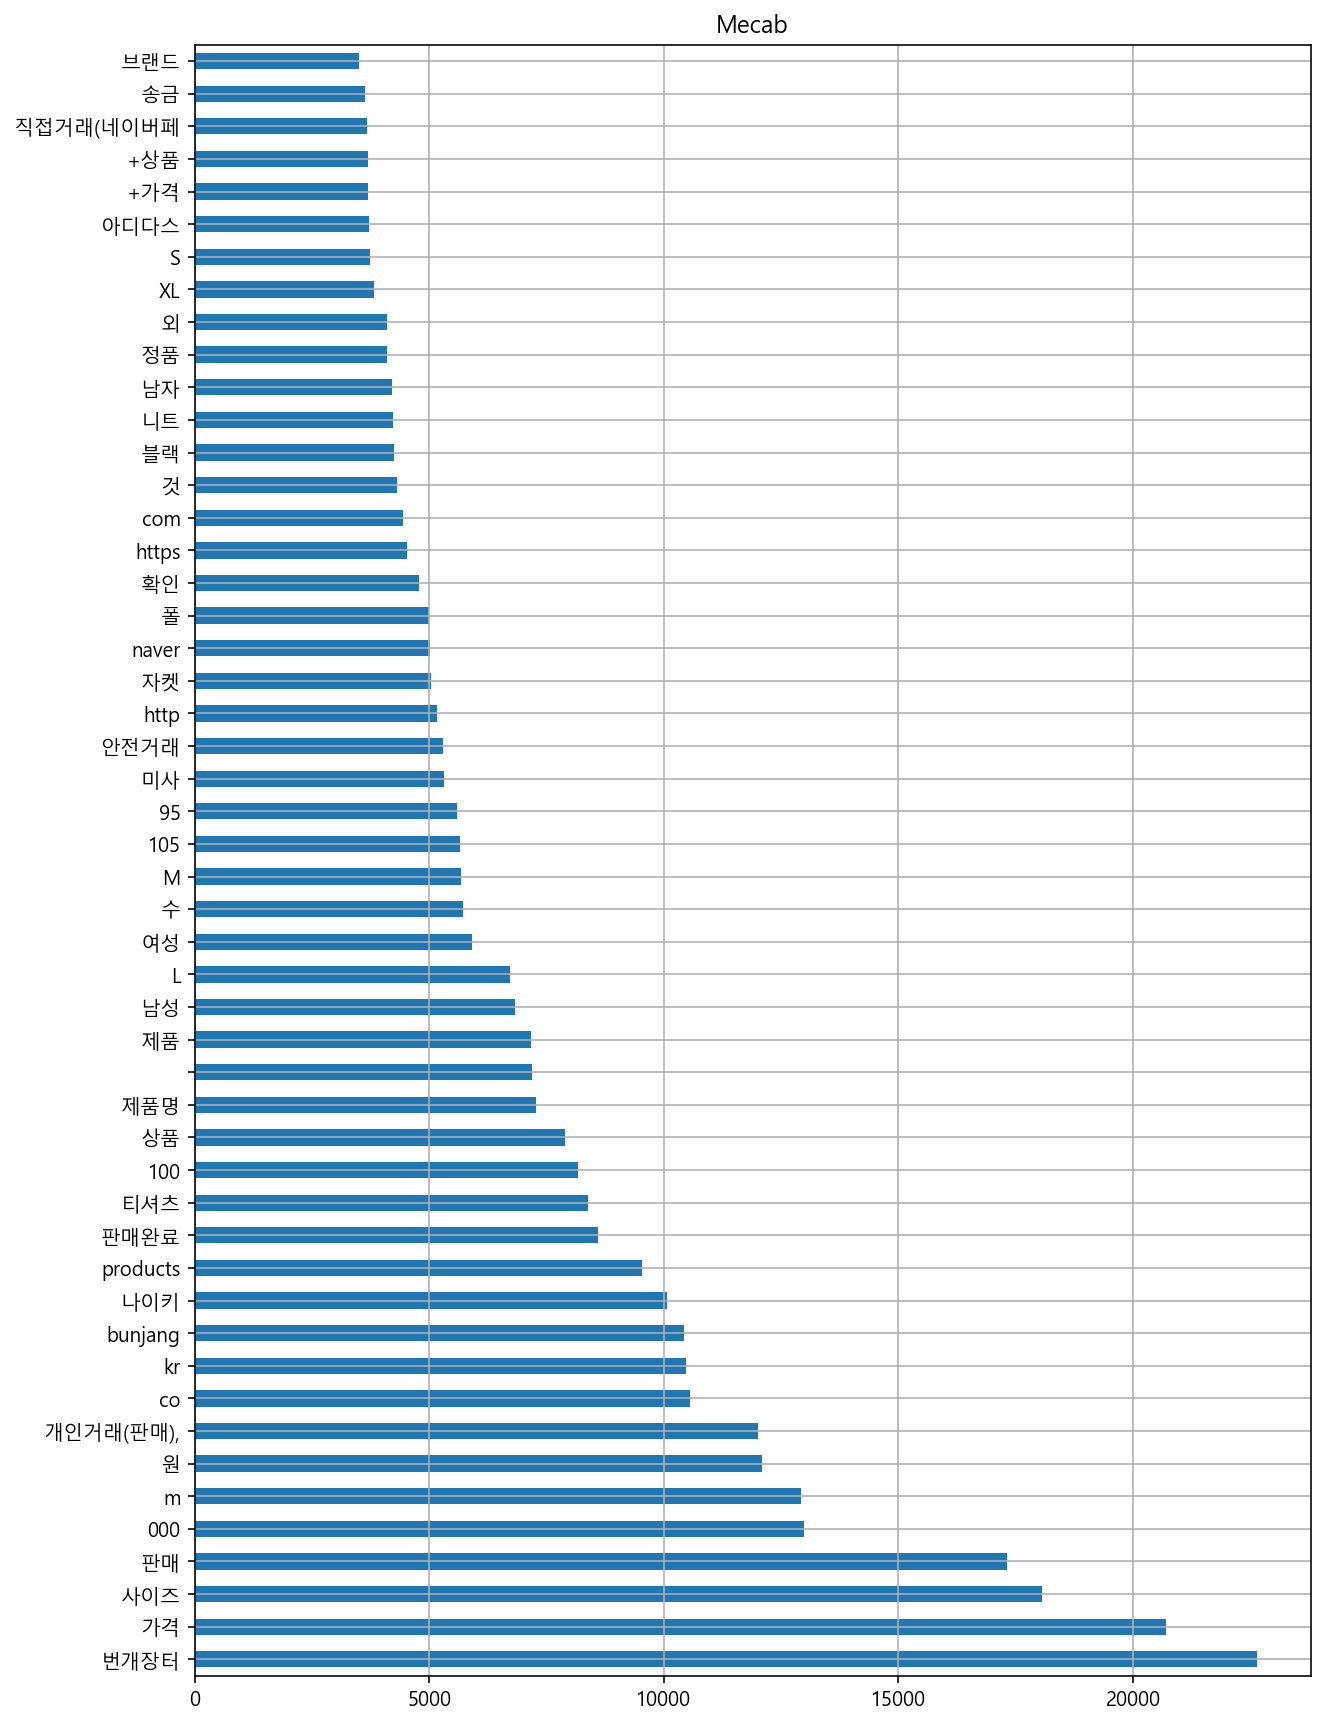

In [7]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Hannanum_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')

## Kkma to Kkma

In [8]:
import pandas as pd
original  = pd.read_csv('df_Kkma.csv', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

In [9]:
from konlpy.tag import Kkma
from collections import Counter
kkma = Kkma()
POS_PASSWORD1 = ['NNG', 'NNP', 'NP', 'UN', 'OL', 'OH']
"""
@ REFERENCE: http://kkma.snu.ac.kr/documents/?doc=postag
NNG: 보통 명사
NNP: 고유 명사
NP: 대명사
UN: 명사추정범주
OL: 외국어
OH: 한자
"""

def preprocess(string):
    rst = ""
    try:
        vocab_pos = kkma.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD1:
                rst = rst + key + " "
        return rst
    
    except: return None
    
    
df_Kkma = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    df_Kkma = df_Kkma.append({'text' : preprocess(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Kkma')
run_time.append(time.time()-start)
df_Kkma.head()

,text
0,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
1,DAY 남미 배낭여행 볼 리비아 라 파 즈 데스 로드 리 리 야경 라 파 즈 시간 ...
2,Made U 스윗 서브 후 리스 반집 업 후드 양털 후드 티 상품명 Made U 스...
3,choiroom 터틀 골지 원피스 니트 세트 뒷면 이룸 베스트 상품 보기 무 배 반...
4,남자 옷 코디 형 스타일 양털 반집 업 후 리스 오버 핏 남자 맨투맨 추천 지금 옷...


In [10]:
run_time

[1076.4250738620758, 1956.6359419822693]

In [11]:
df_Kkma.to_csv("df_Kkma2Kkma.csv", header=False, index=False)

#### 시각화

In [12]:
df_Kkma = pd.read_csv("df_Kkma2Kkma.csv").dropna()

temp = df_Kkma.values.tolist()
list_Kkma = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Kkma.append(vocab)
series_Kkma = pd.Series(list_Kkma)
Kkma_counts = series_Kkma.value_counts()
Kkma_counts

업          108459
아노락         69020
반집          64402
판매          47861
사이즈         44361
            ...  
필립스             1
버터플라이           1
태화              1
진입              1
HP-1262         1
Length: 34448, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

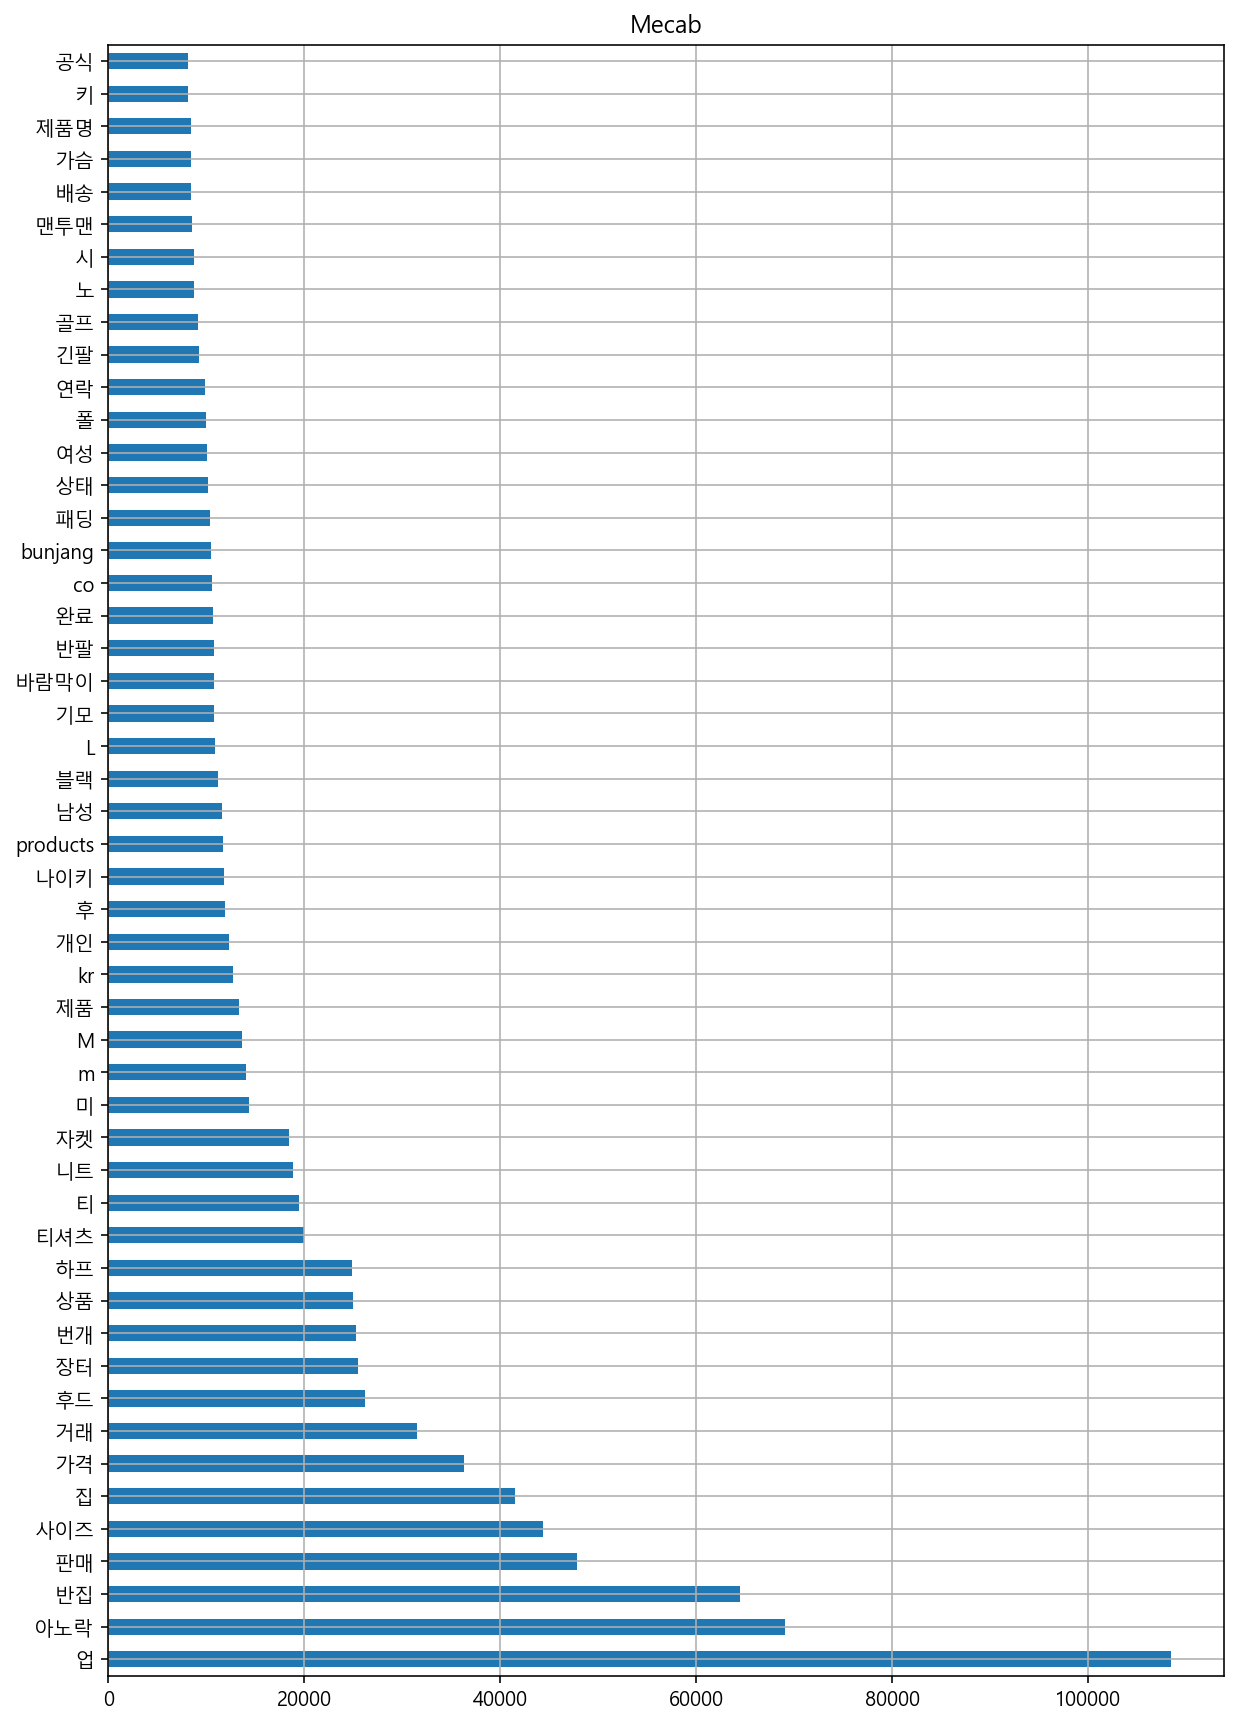

In [13]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Kkma_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')

## Komoran to Komoran

In [14]:
import pandas as pd
original  = pd.read_csv('df_Komoran.csv', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

In [15]:
# PyKomoran 불러오기
# from PyKomoran import *
from konlpy.tag import Komoran

# Komoran 객체 생성
komoran = Komoran()

POS_PASSWORD2 = ['NNG', 'NNP', 'NP', 'SL', 'SH', 'NF']
"""
@ REFERENCE: https://komorandocs.readthedocs.io/ko/latest/firststep/postypes.html
NNG: 일반명사
NNP: 고유명사
NP: 대명사
SL: 외국어
SH: 한자
NF: 명사추정범주
"""
def preprocess2(string):
    rst = ""
    try:
        vocab_pos = komoran.pos(string)
        for key, tag in vocab_pos:
            if tag in POS_PASSWORD2:
                rst = rst + key + " "
            return rst
    except: return None


df_Komoran = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    df_Komoran = df_Komoran.append({'text' : preprocess2(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Komoran')
run_time.append(time.time()-start)
df_Komoran.head()


,text
0,
1,Made
2,남자
3,나이키
4,


In [16]:
run_time

[1076.4250738620758, 1956.6359419822693, 143.54329442977905]

In [17]:
df_Komoran.to_csv("df_Komoran2Komoran.csv", header=False, index=False)

#### 시각화

In [32]:
df_Komoran = pd.read_csv("df_Komoran2Komoran.csv").dropna()

temp = df_Komoran.values.tolist()
list_Komoran = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Komoran.append(vocab)
series_Komoran = pd.Series(list_Komoran)
Komoran_counts = series_Komoran.value_counts()
Komoran_counts

번개      9032
나이키     2702
폴로      1605
남자      1531
남성      1169
        ... 
장안평        1
로메         1
마늘         1
블레이저       1
BEN        1
Length: 4511, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

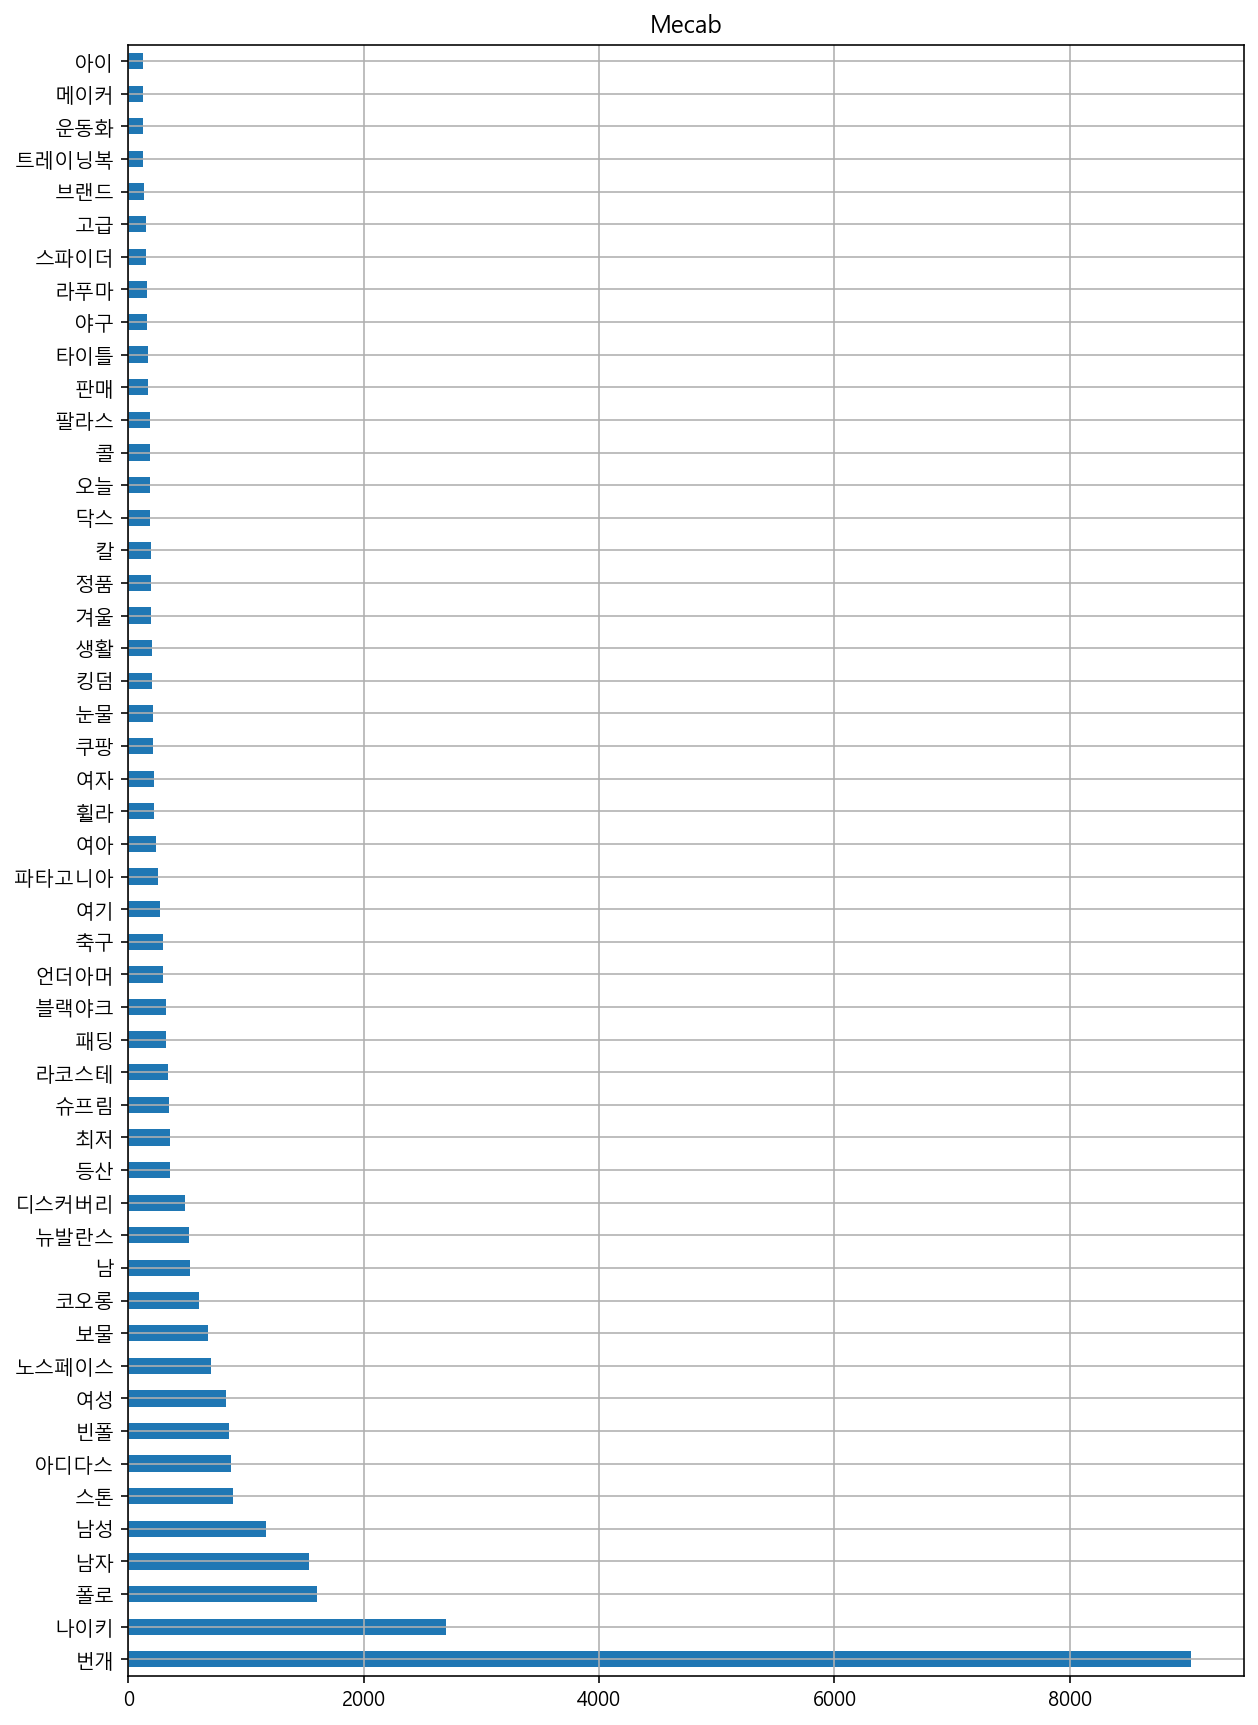

In [33]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Komoran_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')

## Mecab to Mecab

In [20]:
import pandas as pd
original  = pd.read_csv('df_Mecab.csv', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

In [21]:
# # MeCab installation needed
# from konlpy.tag import Mecab
# https://velog.io/@kjyggg/%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EA%B8%B0-Mecab-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-A-to-Z%EC%84%A4%EC%B9%98%EB%B6%80%ED%84%B0-%EB%8B%A8%EC%96%B4-%EC%9A%B0%EC%84%A0%EC%88%9C%EC%9C%84-%EB%93%B1%EB%A1%9D%EA%B9%8C%EC%A7%80
from eunjeon import Mecab
mecab = Mecab()

POS_PASSWORD5 = ['NNG', 'NNP', 'NP', 'SL', 'SH']
"""
NNG: 일반 명사
NNP: 고유 명사
NP: 대명사
SL: 외국어
SH: 한자
"""

def preprocess5(string):
    rst = ""
    try:
        vocab_pos = mecab.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD5:
                rst = rst + key + " "
        return rst
    
    except: return None

df_Mecab = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Mecab = df_Mecab.append({'text' : preprocess5(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Mecab')
run_time.append(time.time()-start)
df_Mecab.head()

,text
0,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
1,DAY 남미 배낭 여행 볼리비아 라파 데스 로드 킬리 킬리 야경 라파 시간 반 이동...
2,Made U 스윗 서브 후 리스 반집 업 후드 글 양털 후드 티 털 상품명 Made...
3,choiroom 터틀 골지 원피스 니트 세트 뒷면 룸 베스트 상품 무배 반 폴라 기...
4,남자 옷 코디 스타일 양털 반집 업 후 리스 오버 핏 남자 맨투맨 추천 옷 남자 맨...


In [22]:
run_time

[1076.4250738620758,
 1956.6359419822693,
 143.54329442977905,
 311.80730152130127]

In [23]:
df_Mecab.to_csv("df_Mecab2Mecab.csv", header=False, index=False)

#### 시각화

In [24]:
df_Mecab = pd.read_csv("df_Mecab2Mecab.csv").dropna()

temp = df_Mecab.values.tolist()
list_Mecab = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Mecab.append(vocab)
series_Mecab = pd.Series(list_Mecab)
Mecab_counts = series_Mecab.value_counts()
Mecab_counts

업                91109
아노락              65920
반집               62926
판매               47768
사이즈              45865
                 ...  
밤바람                  1
Towel                1
nordsrtomrack        1
PpfTkP               1
팔달산                  1
Length: 34956, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

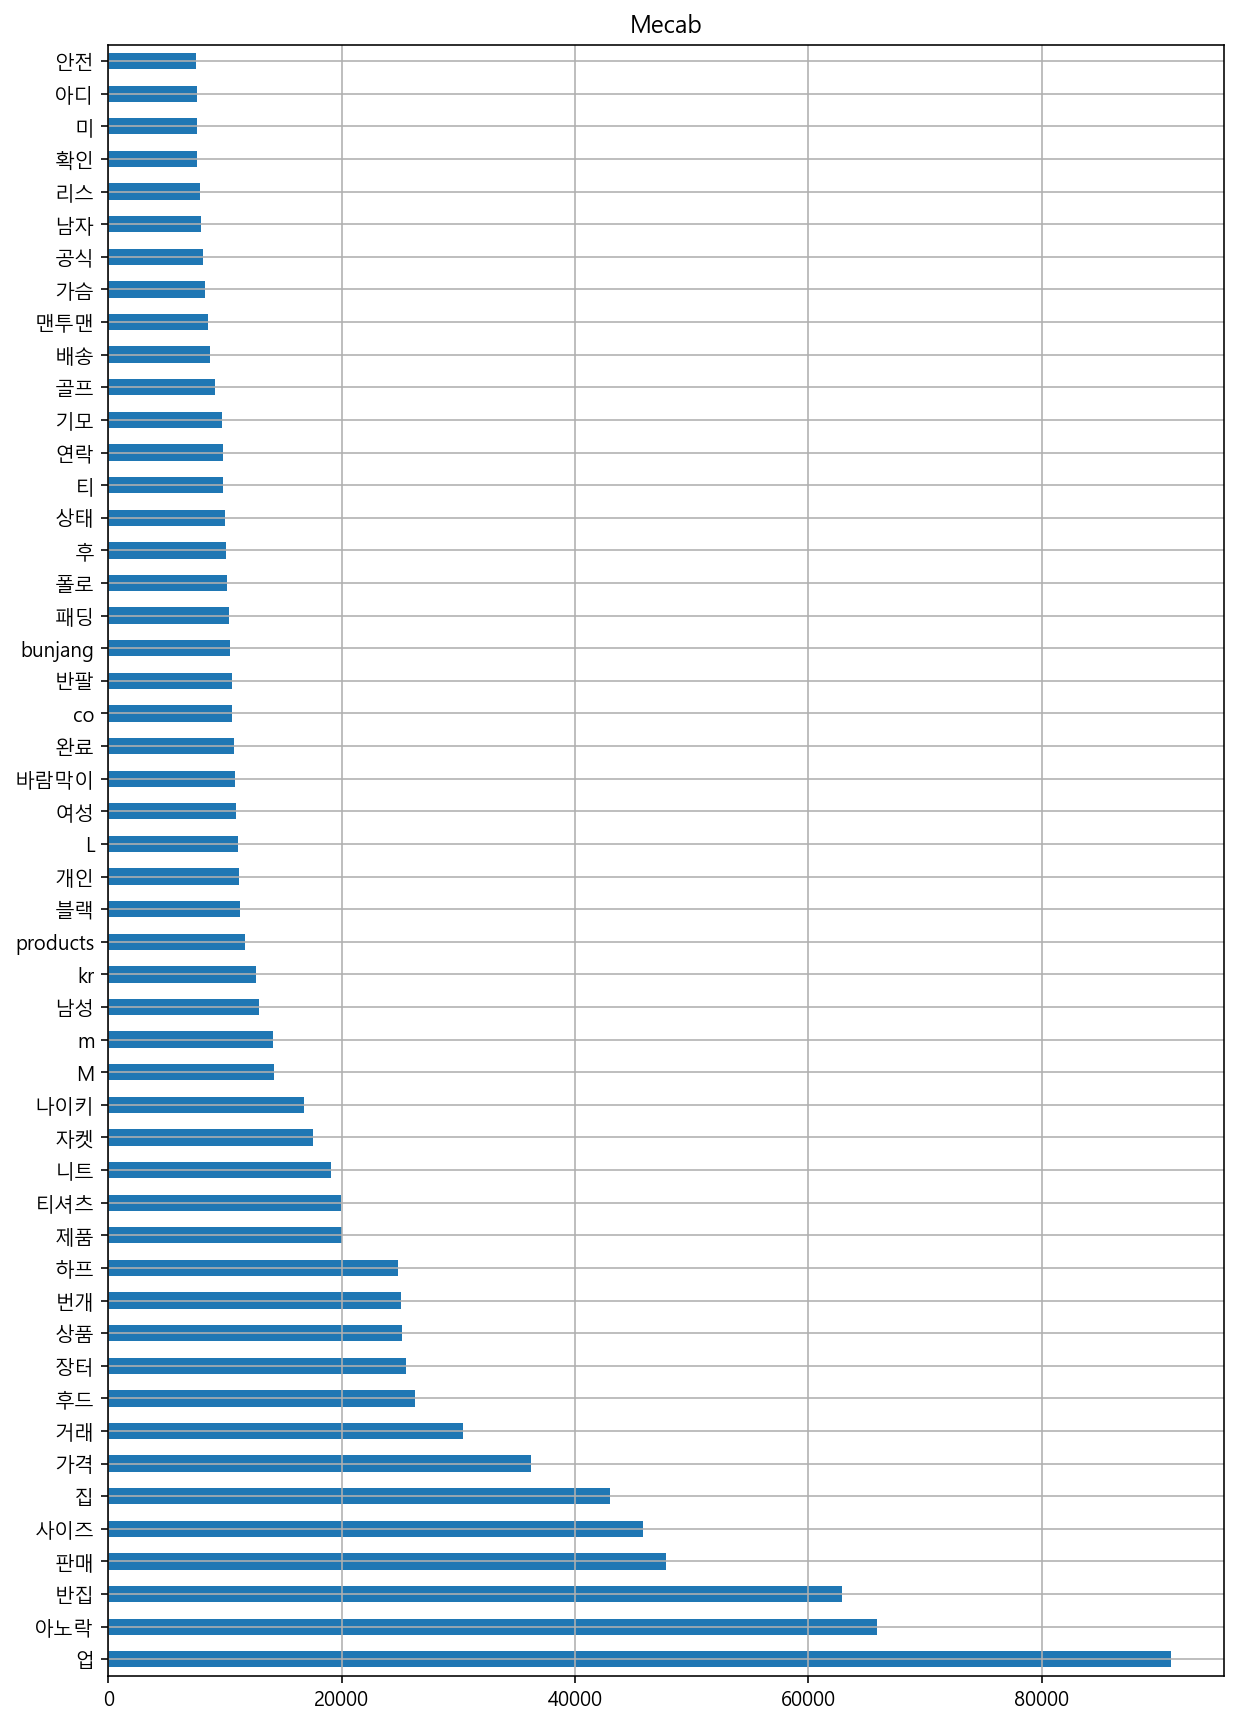

In [25]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Mecab_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')

## Okt to Okt

In [26]:
import pandas as pd
original  = pd.read_csv('df_Okt.csv', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

In [27]:
from konlpy.tag import Okt  
okt=Okt()  

POS_PASSWORD3 = ['Noun']

"""
# Foreign: 외국어, 한자 및 기타 기호
Noun: 명사
# Unknown: 미등록어
"""

def preprocess3(string):
    rst = ""
    try:
        vocab_pos = okt.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD3:
                rst = rst + key + " "
        return rst
    
    except: return None

df_Okt = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Okt = df_Okt.append({'text' : preprocess3(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Okt')
run_time.append(time.time()-start)
df_Okt.head()

,text
0,커버 하프 집업후 리스 원래 양털 아우 터 어쩌다가 커버 집업 사 할인 거기 쿠폰 ...
1,남미 배낭여행 볼리비아 라파즈 데스 로드 킬리킬리 야경 라파즈 시간 반의 이동 후 ...
2,스윗 서브 후리 스반 집업 후드 뽀글이 양털 후드 티 털 것 상품 스윗 서브 후리 ...
3,터틀 울 골지 원피스 니트 세트 면 초 베스트 상품 보기 무배 폴라 기모 배색 프릴...
4,남자 옷코디 형 스타일 양털 집업후 리스 버핏 남자 투 추천 지금 옷 남자 투 추천...


In [28]:
run_time

[1076.4250738620758,
 1956.6359419822693,
 143.54329442977905,
 311.80730152130127,
 549.60777592659]

In [29]:
df_Okt.to_csv("df_Okt2Okt.csv", header=False, index=False)

#### 시각화

In [30]:
df_Okt = pd.read_csv("df_Okt2Okt.csv").dropna()

temp = df_Okt.values.tolist()
list_Okt = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Okt.append(vocab)
series_Okt = pd.Series(list_Okt)
Okt_counts = series_Okt.value_counts()
Okt_counts

집업      74866
판매      51201
락       50501
사이즈     42963
가격      36627
        ...  
및섬          1
어드밴스        1
제왕          1
맛탕          1
팔달산         1
Length: 29174, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

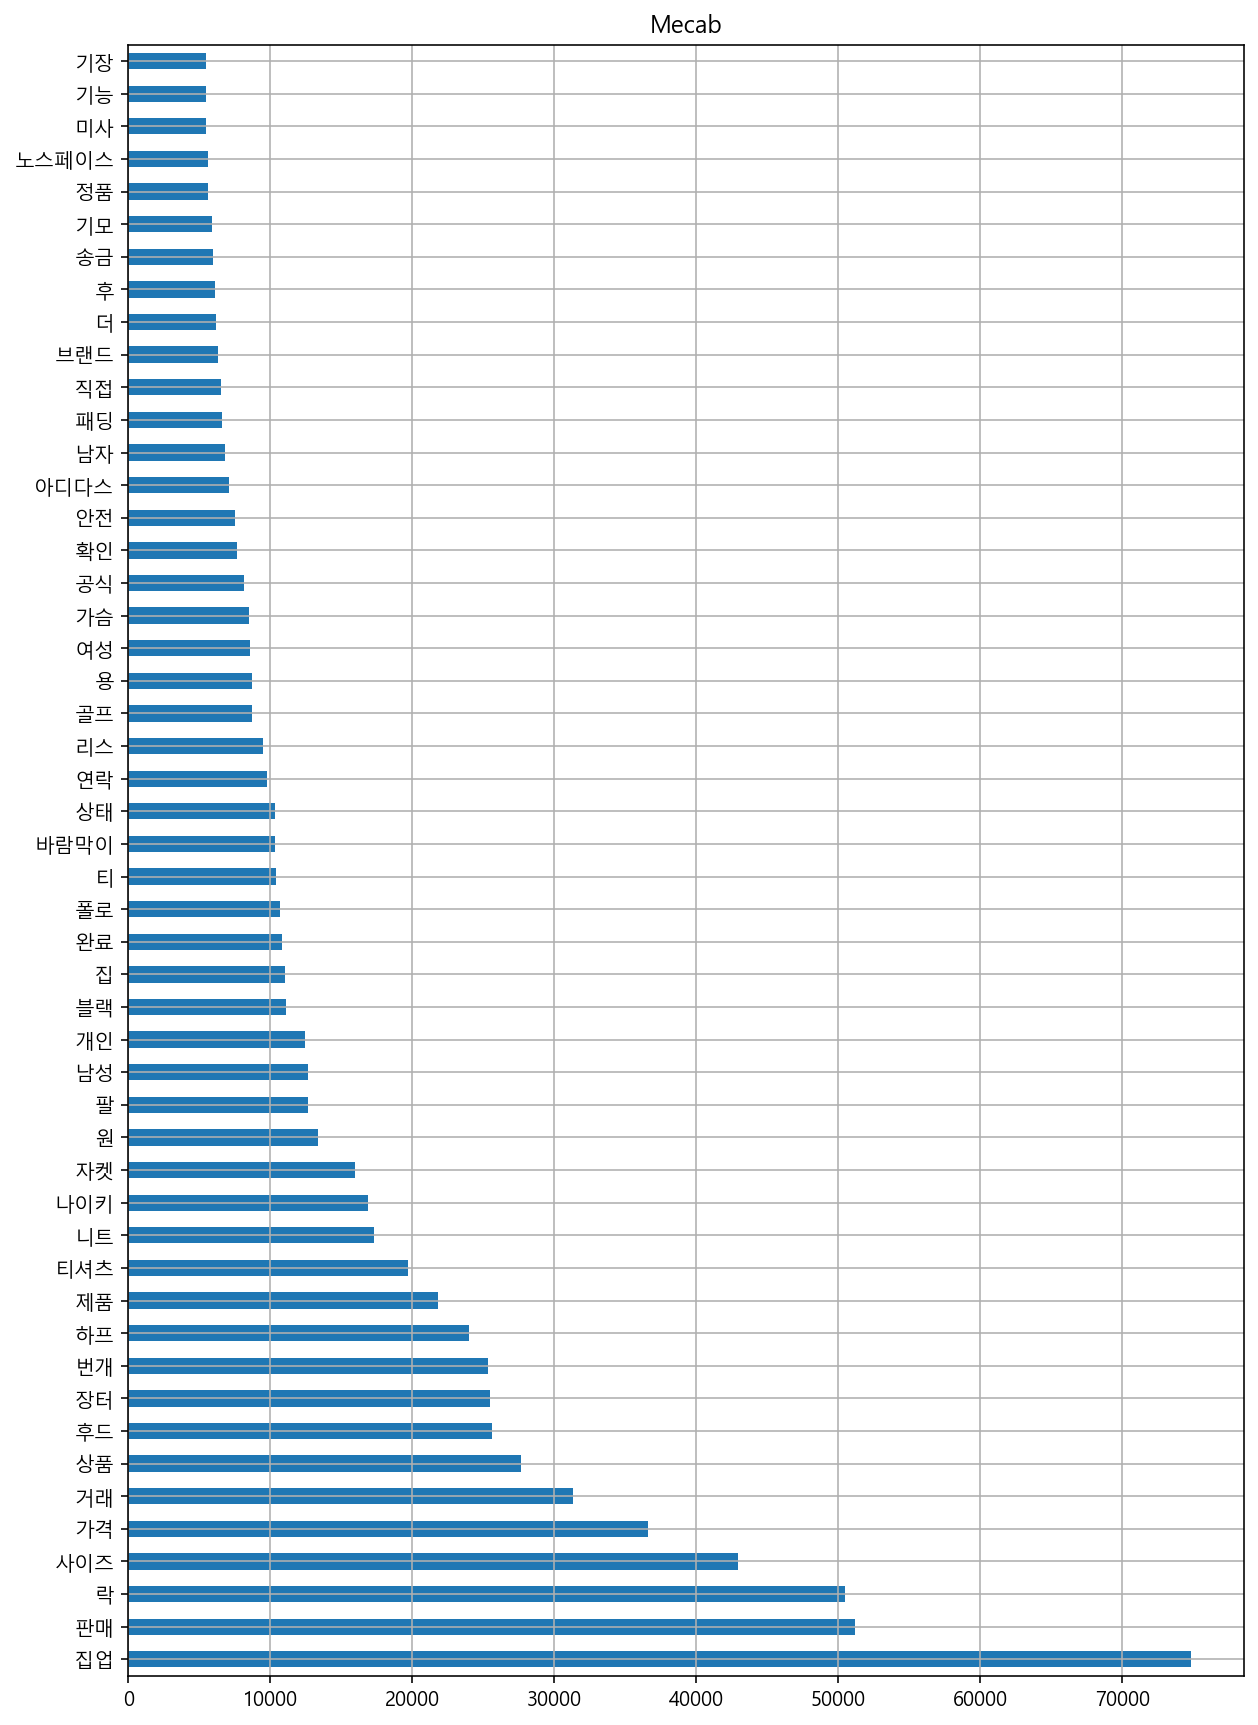

In [31]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Okt_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')

## 수행시간 비교

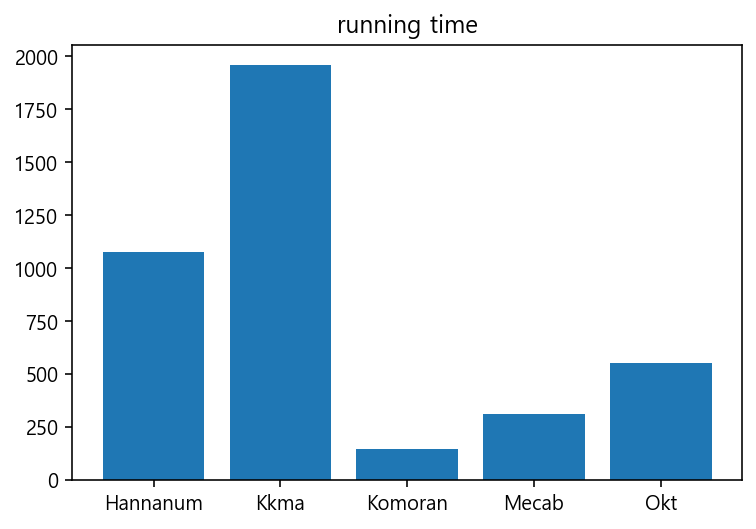

In [34]:
import matplotlib.pyplot as plt
plt.bar(['Hannanum', 'Kkma', 'Komoran', 'Mecab', 'Okt'], 
        run_time)
plt.title("running time")
plt.show()